In [1096]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from livelossplot import PlotLossesKeras  # loss and accuracy plots updating live

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sets imports and formatting

In [1097]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")
campaign_test = pd.read_csv("MLUnige2023_subscriptions_test.csv", index_col="Id")

X = campaign_ad.drop(columns='subscription')
y = campaign_ad['subscription']

cat_vars_strings = ['job', 'marital', 'education', 'device', 'outcome_old']

In [1098]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=46)

In [1099]:
X_train_input = [X_train['job'],
                 X_train['marital'],
                 X_train['education'],
                 X_train['device'],
                 X_train['outcome_old'],
                 X_train.drop(columns=cat_vars_strings)]

In [1100]:
X_valid_input = [X_valid['job'],
                 X_valid['marital'],
                 X_valid['education'],
                 X_valid['device'],
                 X_valid['outcome_old'],
                 X_valid.drop(columns=cat_vars_strings)]

In [1101]:
X_test_input =  [X_test['job'],
                 X_test['marital'],
                 X_test['education'],
                 X_test['device'],
                 X_test['outcome_old'],
                 X_test.drop(columns=cat_vars_strings)]

In [1102]:
X_input = [X['job'],
           X['marital'],
           X['education'],
           X['device'],
           X['outcome_old'],
           X.drop(columns=cat_vars_strings)]

In [1103]:
campaign_test_input = [campaign_test['job'],
                       campaign_test['marital'],
                       campaign_test['education'],
                       campaign_test['device'],
                       campaign_test['outcome_old'],
                       campaign_test.drop(columns=cat_vars_strings)]

# Neural Net construction

In [1104]:
keras.utils.set_random_seed(493)

In [1105]:
n_levels_job = len(X['job'].unique())

input_job       = layers.Input(name='input_job', shape=(1,), dtype='string')
str_to_ints_job = layers.StringLookup(name='str_to_ints_job', vocabulary=X['job'].unique())(input_job)
embed_vecs_job  = layers.Embedding(name='embed_vecs_job',
                                   input_dim=n_levels_job + 1,
                                   output_dim=6)(str_to_ints_job)
flat_job        = layers.Flatten(name='flat_job')(embed_vecs_job)

In [1106]:
n_levels_marital = len(X['marital'].unique())

input_marital       = layers.Input(name='input_marital', shape=(1,), dtype='string')
str_to_ints_marital = layers.StringLookup(name='str_to_ints_marital', vocabulary=X['marital'].unique())(input_marital)
embed_vecs_marital  = layers.Embedding(name='embed_vecs_marital',
                                       input_dim=n_levels_marital + 1,
                                       output_dim=n_levels_marital)(str_to_ints_marital)
flat_marital        = layers.Flatten(name='flat_marital')(embed_vecs_marital)

In [1107]:
n_levels_education = len(X['education'].unique())

input_education       = layers.Input(name='input_education', shape=(1,), dtype='string')
str_to_ints_education = layers.StringLookup(name='str_to_ints_education', vocabulary=X['education'].unique())(input_education)
embed_vecs_education  = layers.Embedding(name='embed_vecs_education',
                                         input_dim=n_levels_education + 1,
                                         output_dim=n_levels_education)(str_to_ints_education)
flat_education        = layers.Flatten(name='flat_education')(embed_vecs_education)

In [1108]:
n_levels_device = len(X['device'].unique())

input_device       = layers.Input(name='input_device', shape=(1,), dtype='string')
str_to_ints_device = layers.StringLookup(name='str_to_ints_device', vocabulary=X['device'].unique())(input_device)
embed_vecs_device  = layers.Embedding(name='embed_vecs_device',
                                      input_dim=n_levels_device + 1,
                                      output_dim=2)(str_to_ints_device)
flat_device        = layers.Flatten(name='flat_device')(embed_vecs_device)

In [1109]:
n_levels_outcome_old = len(X['outcome_old'].unique())

input_outcome_old       = layers.Input(name='input_outcome_old', shape=(1,), dtype='string')
str_to_ints_outcome_old = layers.StringLookup(name='str_to_ints_outcome_old', vocabulary=X['outcome_old'].unique())(input_outcome_old)
embed_vecs_outcome_old  = layers.Embedding(name='embed_vecs_outcome_old',
                                           input_dim=n_levels_outcome_old + 1,
                                           output_dim=2)(str_to_ints_outcome_old)
flat_outcome_old        = layers.Flatten(name='flat_outcome_old')(embed_vecs_outcome_old)

In [1110]:
num_inputs = layers.Input(name='num_inputs', shape=(11,))
num_norm = layers.Normalization(name='num_norm', axis=1)(num_inputs)

merged = layers.concatenate([flat_job,
                             flat_marital,
                             flat_education,
                             flat_device,
                             flat_outcome_old,
                             num_norm],
                             name='merged')

dense1 = layers.Dense(name='dense1', units=32, activation='relu')(merged)
dense2 = layers.Dense(name='dense2', units=16, activation='relu', kernel_regularizer='l2')(dense1)
dense3 = layers.Dense(name='dense3', units=8, activation='relu')(dense2)
dense4 = layers.Dense(name='dense4', units=4, activation='relu')(dense3)
output = layers.Dense(name='output', units=1, activation='sigmoid')(dense4)

In [1111]:
model = keras.Model(inputs=[input_job, input_marital, input_education, input_device, input_outcome_old, num_inputs],
                    outputs=[output])

# Neural Net Visualization

In [1112]:
model.summary()

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_job (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_marital (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 input_education (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 input_device (InputLayer)      [(None, 1)]          0           []                               
                                                                                           

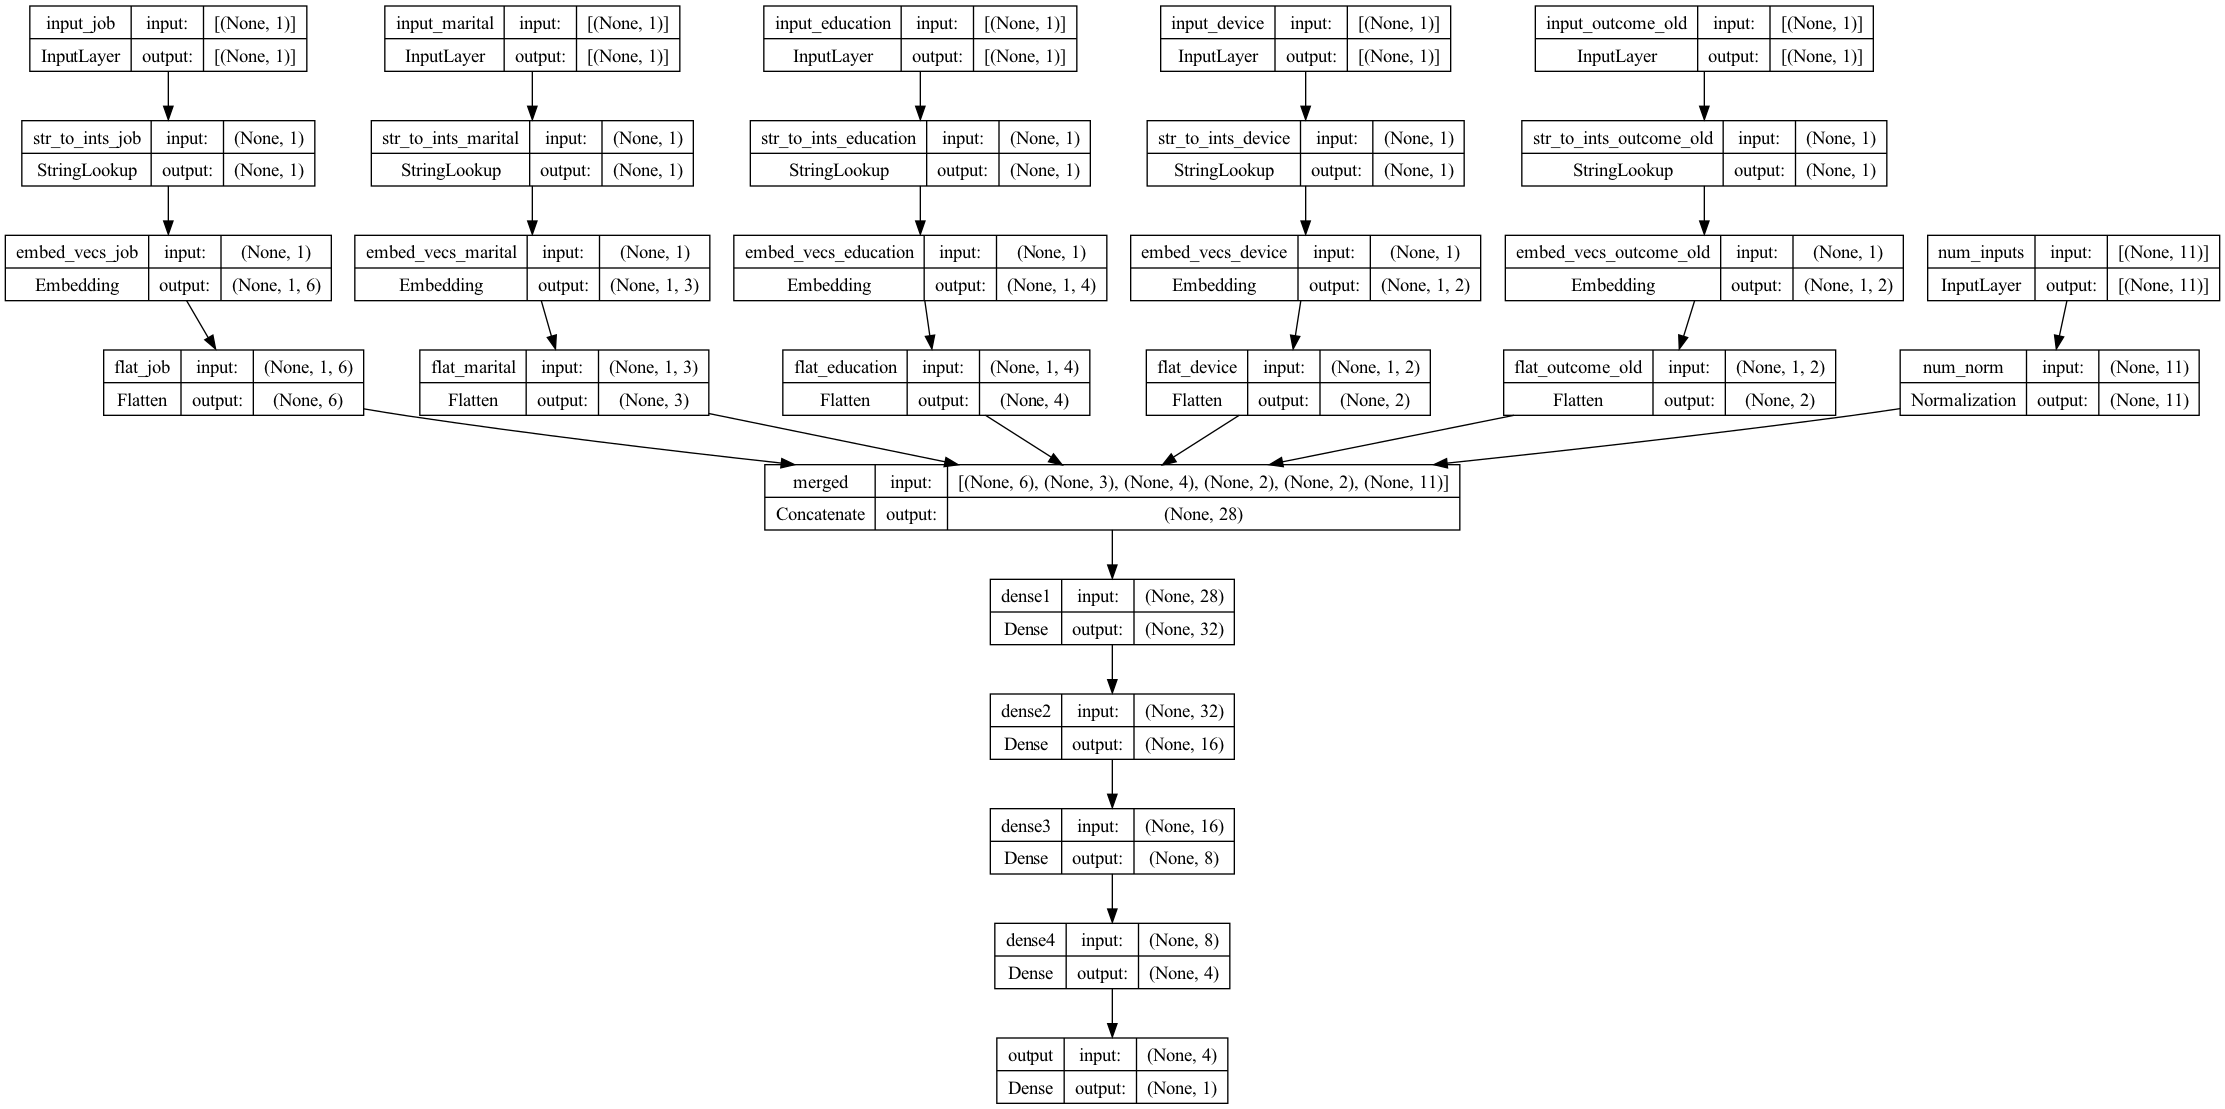

In [1113]:
keras.utils.plot_model(model, show_shapes=True)

# Model compilation and fit

In [1114]:
model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics= ['accuracy'])

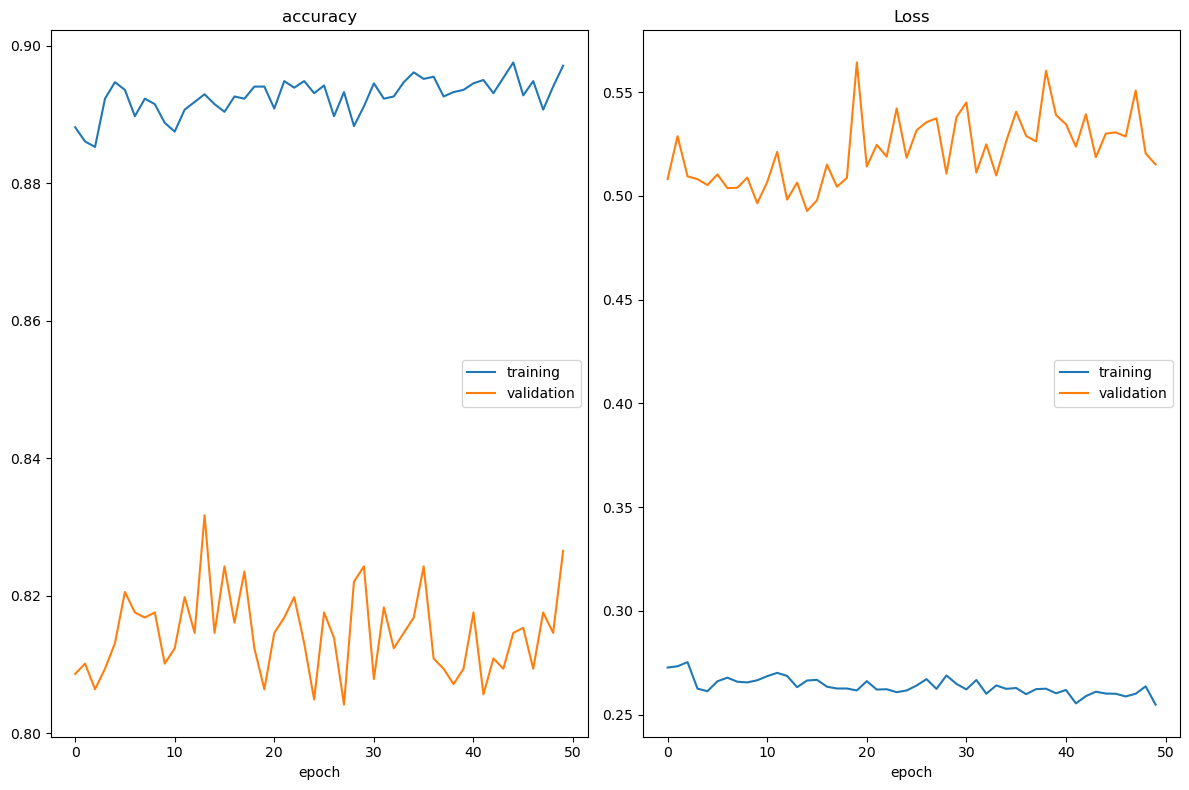

accuracy
	training         	 (min:    0.885, max:    0.898, cur:    0.897)
	validation       	 (min:    0.804, max:    0.832, cur:    0.827)
Loss
	training         	 (min:    0.255, max:    0.275, cur:    0.255)
	validation       	 (min:    0.493, max:    0.564, cur:    0.515)
98/98 [==============================] - 1s 11ms/step - loss: 0.2548 - accuracy: 0.8971 - val_loss: 0.5151 - val_accuracy: 0.8265


In [1122]:
fit_history = model.fit(x=X_train_input, y=y_train, 
                        validation_data=(X_valid_input, y_valid),
                        batch_size=64,
                        epochs=50,
                        shuffle=True,
                        callbacks=[PlotLossesKeras()])

In [1092]:
model.evaluate(X_train_input, y_train)

196/196 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8433


[0.36969536542892456, 0.8432812094688416]

In [1093]:
model.evaluate(X_test_input, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8317


[0.3943726718425751, 0.8317200541496277]

# Cutoff search

In [971]:
train_probas = model.predict(X_train_input)
valid_probas = model.predict(X_valid_input)
test_probas = model.predict(X_test_input)

cutoff_table = pd.DataFrame({'cutoff': 1e-2*np.arange(10, 95, 5)})
cutoff_table['train_acc'] = [np.round(accuracy_score(y_train, (train_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['valid_acc'] = [np.round(accuracy_score(y_valid, (valid_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['test_acc'] = [np.round(accuracy_score(y_test, (test_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table

42/42 [==============================] - 0s 3ms/step


,cutoff,train_acc,valid_acc,test_acc
0,0.10,0.735,0.730,0.718
1,0.15,0.769,0.757,0.758
2,0.20,0.792,0.772,0.786
3,0.25,0.808,0.783,0.808
4,0.30,0.820,0.791,0.813
5,0.35,0.829,0.802,0.818
6,0.40,0.837,0.810,0.830
7,0.45,0.841,0.818,0.832
8,0.50,0.843,0.826,0.839
9,0.55,0.845,0.820,0.838


In [972]:
cutoff_table = pd.DataFrame({'cutoff': 1e-2*np.arange(35, 60, 1)})
cutoff_table['train_acc'] = [np.round(accuracy_score(y_train, (train_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['valid_acc'] = [np.round(accuracy_score(y_valid, (valid_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['test_acc'] = [np.round(accuracy_score(y_test, (test_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table

,cutoff,train_acc,valid_acc,test_acc
0,0.35,0.8294,0.8019,0.8183
1,0.36,0.8320,0.8042,0.8220
2,0.37,0.8326,0.8042,0.8250
3,0.38,0.8350,0.8057,0.8258
4,0.39,0.8359,0.8079,0.8280
5,0.40,0.8374,0.8101,0.8302
6,0.41,0.8377,0.8146,0.8310
7,0.42,0.8382,0.8168,0.8302
8,0.43,0.8391,0.8138,0.8317
9,0.44,0.8402,0.8146,0.8317


In [982]:
treshold = 0.5

# Fit on whole `X` and prediction on `campaign_test`

In [973]:
fit_history = model.fit(x=X_input, y=y, 
                   validation_data=(X_valid_input, y_valid),
                   batch_size=64,
                   epochs=50)

Epoch 1/50
140/140 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8391 - val_loss: 0.3974 - val_accuracy: 0.8243
Epoch 2/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8312 - val_loss: 0.3921 - val_accuracy: 0.8243
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8352 - val_loss: 0.3865 - val_accuracy: 0.8295
Epoch 4/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8369 - val_loss: 0.3836 - val_accuracy: 0.8250
Epoch 5/50
140/140 [==============================] - 1s 4ms/step - loss: 0.3619 - accuracy: 0.8353 - val_loss: 0.3979 - val_accuracy: 0.8124
Epoch 6/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8361 - val_loss: 0.3939 - val_accuracy: 0.8168
Epoch 7/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8353 - val_loss: 0.3840 - val_accuracy: 0.8250
Epoch 

In [974]:
model.evaluate(X_input, y)

280/280 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8513


[0.3273826539516449, 0.8513181209564209]

In [989]:
y_REAL_test = (model.predict(campaign_test_input) > treshold).astype(int)
y_REAL_test = y_REAL_test.ravel()
y_REAL_test

120/120 [==============================] - 1s 6ms/step


array([0, 1, 0, ..., 0, 1, 1])

In [990]:
file = open('test_file_neuralnets.csv', 'w')
writer = csv.writer(file)
writer.writerow(['Id', 'subscription'])
for i in range(len(y_REAL_test)):
    writer.writerow([i, y_REAL_test[i]])
file.close()

# Weights vectors of categoricals

In [1000]:
job_weights = pd.DataFrame(model.get_layer('embed_vecs_job').get_weights()[0])

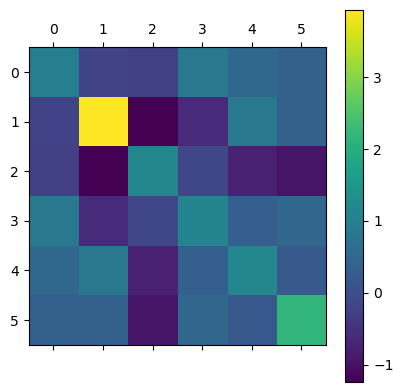

In [1001]:
similarities = np.empty(shape=(6,6))

for i in range(6):
    for j in range(6):
        dot_prod = job_weights.iloc[:,i].dot(job_weights.iloc[:,j])
        similarities[i][j] = dot_prod

import matplotlib.pyplot as plt

plt.matshow(similarities)
cb = plt.colorbar()
plt.show()

In [1002]:
pd.DataFrame(similarities)

,0,1,2,3,4,5
0,1.001211,-0.186597,-0.255103,0.829240,0.505647,0.344947
1,-0.186597,3.936415,-1.242180,-0.623482,0.827553,0.339651
2,-0.255103,-1.242180,1.130049,-0.147550,-0.768152,-0.945809
3,0.829240,-0.623482,-0.147550,1.102371,0.308509,0.463681
4,0.505647,0.827553,-0.768152,0.308509,1.146219,0.203859
5,0.344947,0.339651,-0.945809,0.463681,0.203859,2.159971
